In [68]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

In [69]:
!pip install --upgrade pip -q

#importación de las extenciones de pandas
%run pandas-missing-extension.ipynb

In [70]:
# Configurar el aspecto general de las gráficas del proyecto
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

# Lectura de DataFrame

In [71]:
pedestrian_df = pyreadr.read_r("./data/pedestrian.rda")
df= pedestrian_df["pedestrian"]
df.head()

,hourly_counts,date_time,year,month,month_day,week_day,hour,sensor_id,sensor_name
0,883,2016-01-01 00:00:00,2016,January,1,Friday,0,2,Bourke Street Mall (South)
1,597,2016-01-01 01:00:00,2016,January,1,Friday,1,2,Bourke Street Mall (South)
2,294,2016-01-01 02:00:00,2016,January,1,Friday,2,2,Bourke Street Mall (South)
3,183,2016-01-01 03:00:00,2016,January,1,Friday,3,2,Bourke Street Mall (South)
4,118,2016-01-01 04:00:00,2016,January,1,Friday,4,2,Bourke Street Mall (South)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37700 entries, 0 to 37699
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   hourly_counts  35152 non-null  object        
 1   date_time      37700 non-null  datetime64[ns]
 2   year           37700 non-null  int32         
 3   month          37700 non-null  category      
 4   month_day      37700 non-null  int32         
 5   week_day       37700 non-null  category      
 6   hour           37700 non-null  int32         
 7   sensor_id      37700 non-null  int32         
 8   sensor_name    37700 non-null  object        
dtypes: category(2), datetime64[ns](1), int32(4), object(2)
memory usage: 1.5+ MB


# Detección de datos faltantes

In [73]:
#Calculo de valores faltantes utilizando la extensión depandas
df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,hourly_counts,2548,37700,6.758621
1,date_time,0,37700,0.000000
2,year,0,37700,0.000000
3,month,0,37700,0.000000
4,month_day,0,37700,0.000000
5,week_day,0,37700,0.000000
6,hour,0,37700,0.000000
7,sensor_id,0,37700,0.000000
8,sensor_name,0,37700,0.000000


In [74]:
#Calculo de valores faltantes de forma manual 
(
    df
    .isnull()
    .sum()
    .reset_index(name="n_perdidos")
    .rename(columns={"index":"variable"})
    .assign(
        n_casos = len(df),
        porcentaje_perdido= (lambda df:
                                df.n_perdidos/df.n_casos* 100)
    )
)

,variable,n_perdidos,n_casos,porcentaje_perdido
0,hourly_counts,2548,37700,6.758621
1,date_time,0,37700,0.000000
2,year,0,37700,0.000000
3,month,0,37700,0.000000
4,month_day,0,37700,0.000000
5,week_day,0,37700,0.000000
6,hour,0,37700,0.000000
7,sensor_id,0,37700,0.000000
8,sensor_name,0,37700,0.000000


In [256]:
#se valida que no existan datos faltantes con otros valores

list_unique=[]
for x in df:
    list_unique.append({x: pd.unique(df[f"{x}"])})

list_unique

[{'hourly_counts': array([883, 597, 294, ..., 1476, 1385, 1566], dtype=object)},
 {'date_time': array(['2016-01-01T00:00:00.000000000', '2016-01-01T01:00:00.000000000',
         '2016-01-01T02:00:00.000000000', ...,
         '2016-12-31T21:00:00.000000000', '2016-12-31T22:00:00.000000000',
         '2016-12-31T23:00:00.000000000'], dtype='datetime64[ns]')},
 {'year': array([2016], dtype=int32)},
 {'month': ['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
  Length: 12
  Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']},
 {'month_day': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
        dtype=int32)},
 {'week_day': ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']
  Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Th

# Tabulación de datos perdidos en n variables

In [84]:
#Extensión de pandas
df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,8,88.888889
1,2548,1,11.111111


In [83]:
#Manual
(
    df
    .missing.missing_variable_summary()
    .value_counts("n_missing")
    .reset_index()
    .rename(columns={"n_missing":"n_faltante_por_n_variables", 0:"n_variables"})
    .assign(
        porcentaje = lambda df: df.n_variables/df.n_variables.sum()*100
    )
    .sort_values("porcentaje", ascending = False)
)

,n_faltante_por_n_variables,n_variables,porcentaje
0,0,8,88.888889
1,2548,1,11.111111


# Datos faltantes por Caso

In [86]:
df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,0,0.0
1,1,0,0.0
2,2,0,0.0
3,3,0,0.0
4,4,0,0.0
...,...,...,...
37695,37695,0,0.0
37696,37696,0,0.0
37697,37697,0,0.0
37698,37698,0,0.0


In [105]:
(
    df
    .assign(
        caso = lambda df : df.index,
        n_faltantes= lambda df : df.apply(
            axis="columns", func = lambda x : x.isnull().sum()
        ),
        porcentaje= lambda df : df.n_faltantes/df.shape[1]*100
    )
)[["caso","n_faltantes","porcentaje"]]



,caso,n_faltantes,porcentaje
0,0,0,0.0
1,1,0,0.0
2,2,0,0.0
3,3,0,0.0
4,4,0,0.0
...,...,...,...
37695,37695,0,0.0
37696,37696,0,0.0
37697,37697,0,0.0
37698,37698,0,0.0


# Tabulación de datos faltantes 

In [108]:
df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,0,35152,93.241379
1,1,2548,6.758621


In [112]:
df.missing.missing_variable_span(variable="hourly_counts",span_every=1000)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,0,1000,0.000000,100.000000
1,1,0,1000,0.000000,100.000000
2,2,0,1000,0.000000,100.000000
3,3,0,1000,0.000000,100.000000
4,4,0,1000,0.000000,100.000000
5,5,0,1000,0.000000,100.000000
6,6,1,999,0.100000,99.900000
7,7,0,1000,0.000000,100.000000
8,8,0,1000,0.000000,100.000000
9,9,0,1000,0.000000,100.000000


In [114]:
df.missing.missing_variable_run(variable="hourly_counts")

,run_length,is_na
0,6628,complete
1,1,missing
2,5250,complete
3,624,missing
4,3652,complete
5,1,missing
6,1290,complete
7,744,missing
8,7420,complete
9,1,missing


# Visualización de datos faltantes

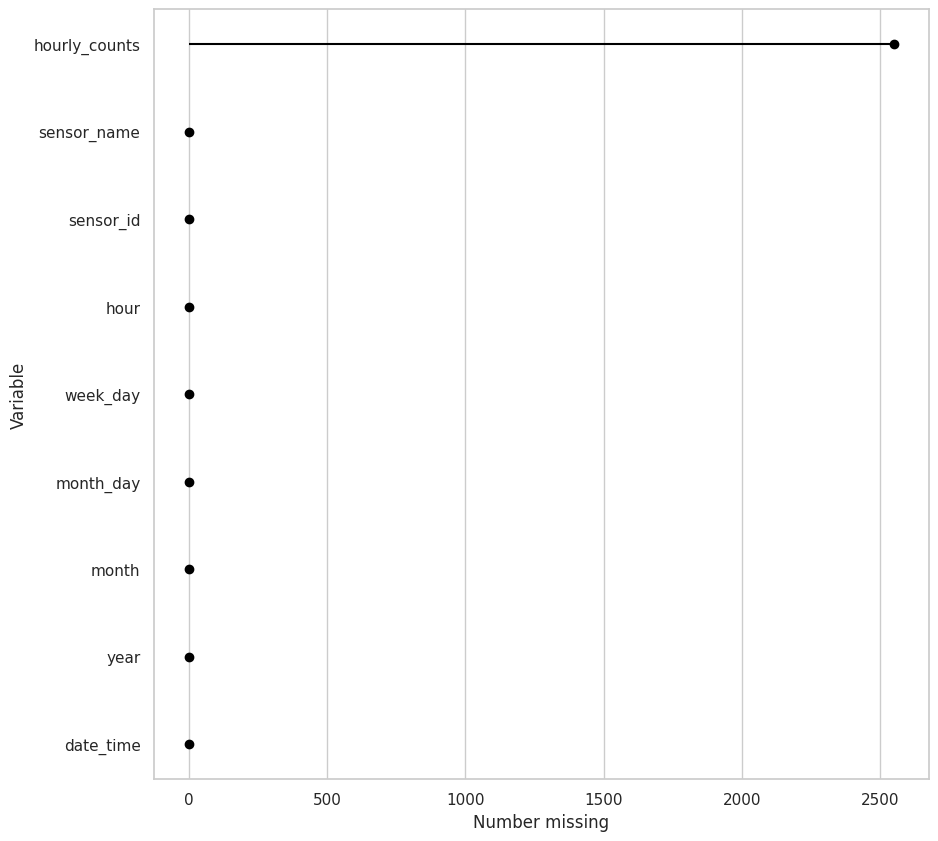

In [118]:
df.missing.missing_variable_plot()

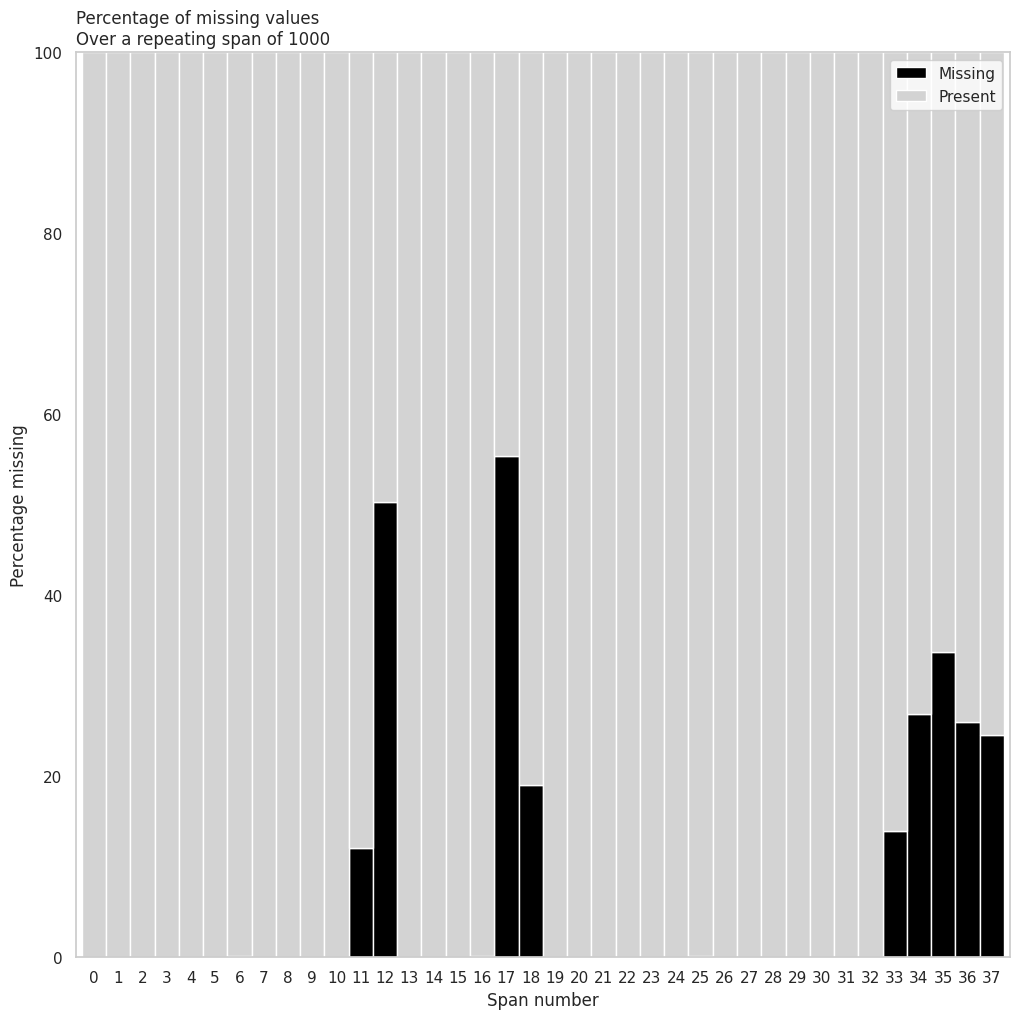

In [123]:
df.missing.missing_variable_span_plot(variable="hourly_counts", span_every=1000,rot=0)

<AxesSubplot:>

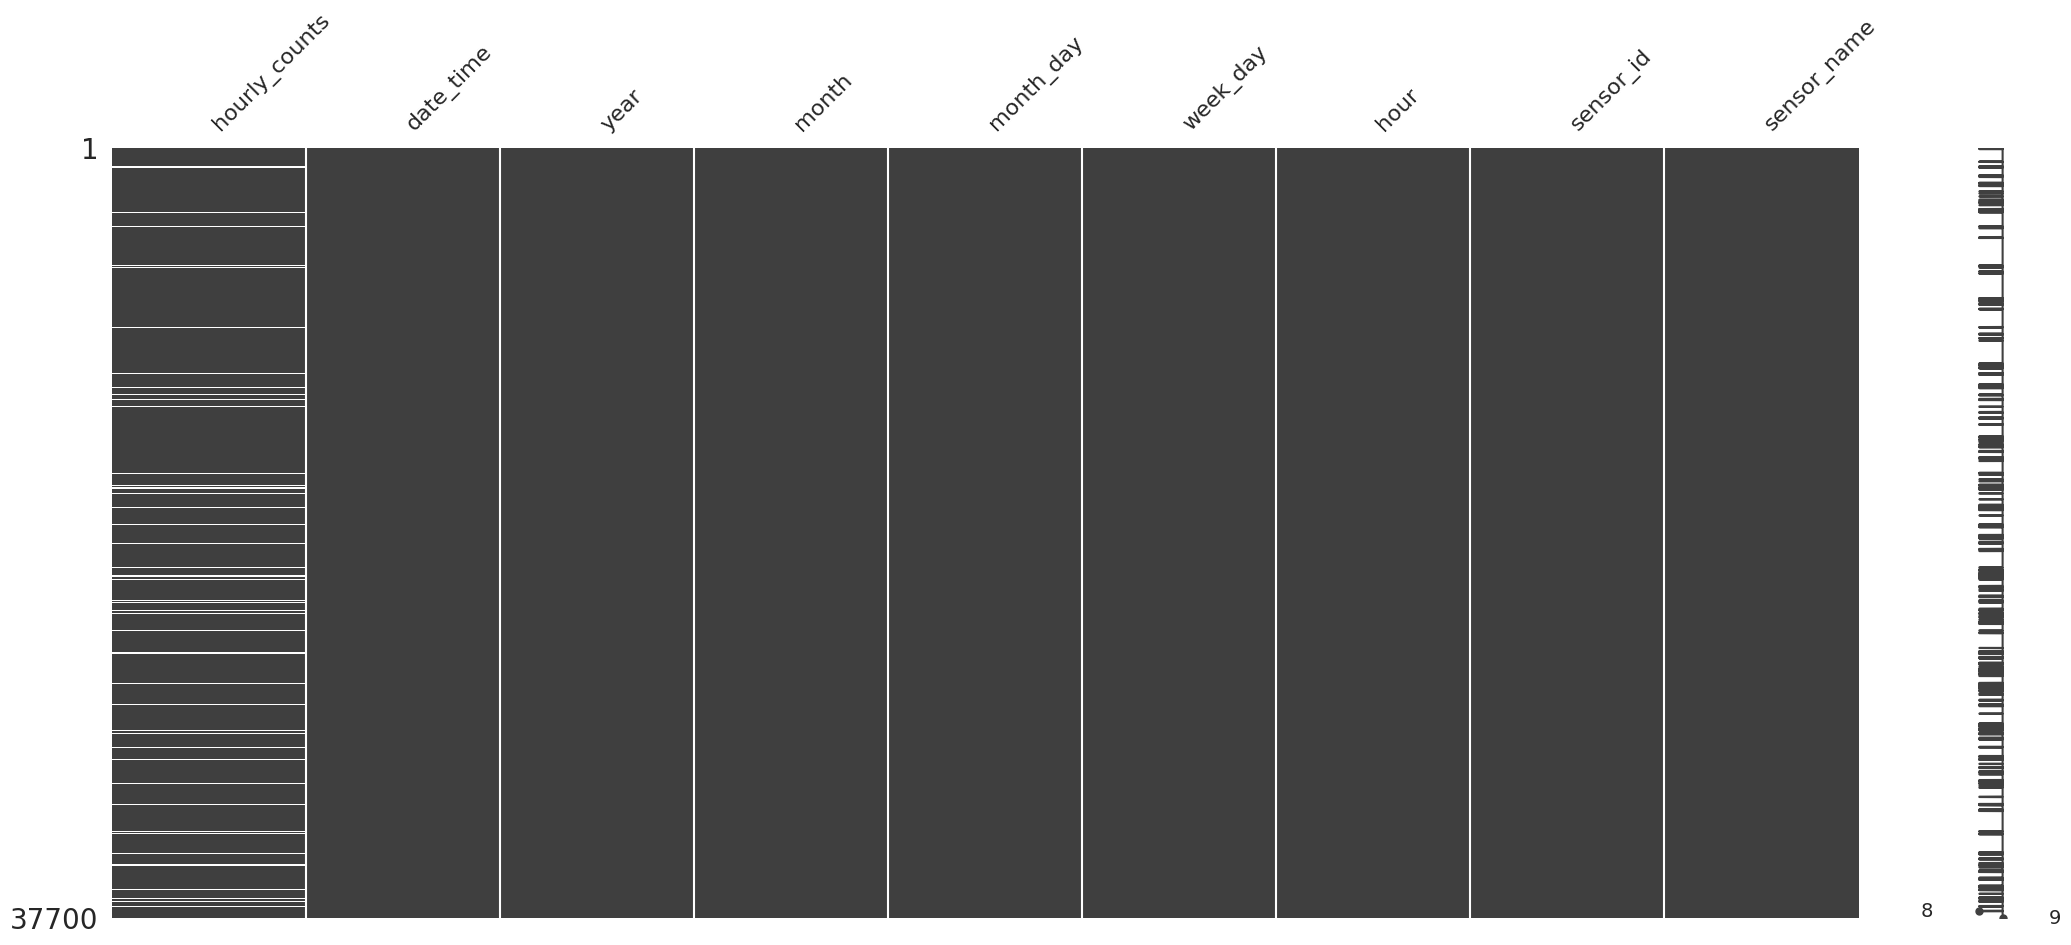

In [154]:
df.missing.sort_variables_by_missingness().sort_values(by="month_day").pipe(missingno.matrix)

# Matriz de sombras

In [159]:
# Manual
(
    df
    .isna()
    .replace({
        False : "Completo",
        True : "Faltante"
    })
    .add_suffix("_NA")
    .pipe(lambda df_NA: pd.concat([df, df_NA], axis="columns"))
)

,hourly_counts,date_time,year,month,month_day,week_day,hour,sensor_id,sensor_name,hourly_counts_NA,date_time_NA,year_NA,month_NA,month_day_NA,week_day_NA,hour_NA,sensor_id_NA,sensor_name_NA
0,883,2016-01-01 00:00:00,2016,January,1,Friday,0,2,Bourke Street Mall (South),Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo
1,597,2016-01-01 01:00:00,2016,January,1,Friday,1,2,Bourke Street Mall (South),Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo
2,294,2016-01-01 02:00:00,2016,January,1,Friday,2,2,Bourke Street Mall (South),Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo
3,183,2016-01-01 03:00:00,2016,January,1,Friday,3,2,Bourke Street Mall (South),Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo
4,118,2016-01-01 04:00:00,2016,January,1,Friday,4,2,Bourke Street Mall (South),Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37695,349,2016-12-31 19:00:00,2016,December,31,Saturday,19,23,Spencer St-Collins St (South),Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo
37696,337,2016-12-31 20:00:00,2016,December,31,Saturday,20,23,Spencer St-Collins St (South),Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo
37697,356,2016-12-31 21:00:00,2016,December,31,Saturday,21,23,Spencer St-Collins St (South),Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo
37698,459,2016-12-31 22:00:00,2016,December,31,Saturday,22,23,Spencer St-Collins St (South),Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo,Completo


In [160]:
# Extensión de pandas 
df.missing.bind_shadow_matrix()

,hourly_counts,date_time,year,month,month_day,week_day,hour,sensor_id,sensor_name,hourly_counts_NA,date_time_NA,year_NA,month_NA,month_day_NA,week_day_NA,hour_NA,sensor_id_NA,sensor_name_NA
0,883,2016-01-01 00:00:00,2016,January,1,Friday,0,2,Bourke Street Mall (South),Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,597,2016-01-01 01:00:00,2016,January,1,Friday,1,2,Bourke Street Mall (South),Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,294,2016-01-01 02:00:00,2016,January,1,Friday,2,2,Bourke Street Mall (South),Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,183,2016-01-01 03:00:00,2016,January,1,Friday,3,2,Bourke Street Mall (South),Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
4,118,2016-01-01 04:00:00,2016,January,1,Friday,4,2,Bourke Street Mall (South),Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37695,349,2016-12-31 19:00:00,2016,December,31,Saturday,19,23,Spencer St-Collins St (South),Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
37696,337,2016-12-31 20:00:00,2016,December,31,Saturday,20,23,Spencer St-Collins St (South),Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
37697,356,2016-12-31 21:00:00,2016,December,31,Saturday,21,23,Spencer St-Collins St (South),Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
37698,459,2016-12-31 22:00:00,2016,December,31,Saturday,22,23,Spencer St-Collins St (South),Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


# Detección de distribución de datos faltantes

/home/bragu98/proyecto_1/curso-de-manejo-de-datos-faltantes/venv/lib/python3.9/site-packages/seaborn/distributions.py:857: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(
/home/bragu98/proyecto_1/curso-de-manejo-de-datos-faltantes/venv/lib/python3.9/site-packages/seaborn/distributions.py:857: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(


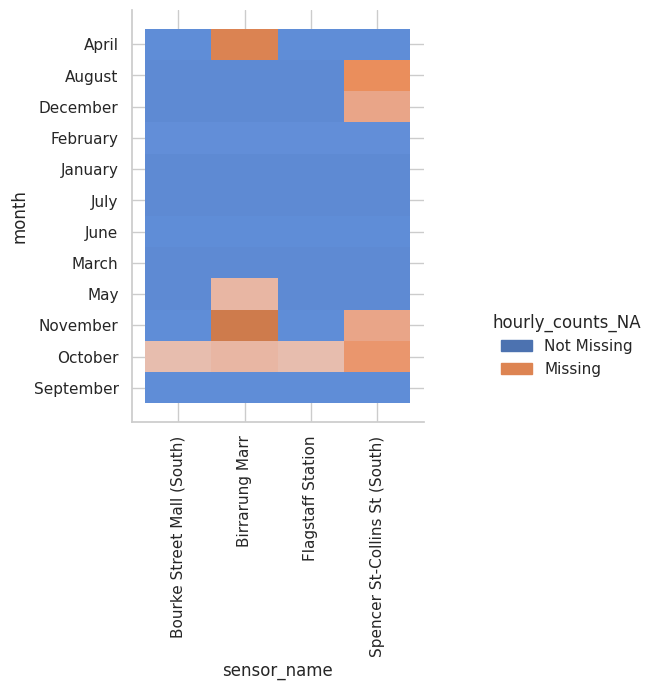

In [192]:
(
    df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(lambda df : sns.displot(data= df, x="sensor_name", y= "month", hue="hourly_counts_NA",))
    .pipe(lambda df : df.set_xticklabels(rotation=90))
)

In [316]:
meses=[mes for mes in pd.unique(df.month)]
sensor_name=[sensor for sensor in pd.unique(df.sensor_name)]

df_1 = [[mes, 0, 0, 0, 0] for mes in meses]

df_1 = pd.DataFrame(df_1).rename(columns={0:"mes",1:sensor_name[0],2:sensor_name[1],3:sensor_name[2],4:sensor_name[3]}).set_index("mes")


In [317]:
ind = 0

for missing in df.hourly_counts_NA:
    if missing == True:
        for mes in df_1.index:
            if mes == df.month[ind]:
                df_1.loc[df.month[ind],df.sensor_name[ind]] +=1
        ind += 1
    else:
        ind +=1

df_1.sum()

Bourke Street Mall (South)          1
Birrarung Marr                   1369
Flagstaff Station                   1
Spencer St-Collins St (South)    1177
dtype: int64

# Imputación de datos faltantes

In [220]:
# Se actualiza DF con datos imputados
df = (
    df
    .select_columns("hourly_counts")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        imputed=lambda df: df.hourly_counts_NA 
    )
    .rename(columns={"hourly_counts":"hourly_counts_imp"})
    .pipe(lambda df_imp: pd.concat([df, df_imp], axis="columns"))
)